# Marvel Dialogue Classification
#### CS 345 Final Project
By: Preston Dunton  
December 8, 2020

<img src="https://blog.umhb.edu/wp-content/uploads/2019/06/mcu-1920x1080.jpg" alt="MCU Banner" width="60%" height="60%" align="center">

## Table of Contents
- [**Introduction**](#introduction)
    - [The Problem](#the-problem)
    - [About the Dataset](#about-the-dataset)
- [**Methods**](#methods)
    - [Grid Searching](#grid-searching)
    - [Stop Words](#stop-words)
    - [Stemming](#stemming)
    - [TF / IDF Transformations](#tfidf)
    - [Imports, Constants, and Classes](#imports-constants-classes)
    - [Preliminary Data Analysis](#data-analysis)
        - [Line Count Distributions](#line-count-distributions)
        - [Words Per Line Distributions](#words-per-line-distributions)
    - [Dataset Preprocessing](#preprocessing)
    - [Models](#models)
        - [Model 1](#model1)
        - [Model 2](#model2)
        - [Model 3](#model3)
        - [Model 4](#model4)
        - [Model 5](#model5)
        - [Model 6](#model6)
        - [Model 7](#model7)
        - [Model 8](#model8)
        - [Model 9](#model9)
        - [Model 10](#model10)
        - [Model 11](#model11)
        - [Model 12](#model12)
- [**Results**](#results)
    - [Cross Validation Scores (Balanced Accuracy)](#cvscores)
    - [Best Model](#best-model)
    - [Baseline Comparisons](#baselines)
        - [Majority Classifier](#majority-classifier)
        - [Random Classifier](#random-classifier)
        - [Comparison with Model 4](#comparison-model-4)
    - [Confusion Matrix](#confusion-matrix)
    - [Learning Curves](#learning-curves)
- [**Conclusions**](#conclusions)
    - [Project Improvements](#project-improvements)
    - [Takeaways](#takeaways)
    - [Moving Forward](#moving-forward)
- [**Sources**](#sources)



# Introduction  <a name="introduction"></a>
This notebook summarizes the project that can be found in [this repository](https://github.com/prestondunton/marvel-dialogue-nlp). This project is my final project for CS 345, Machine Learning Foundations and Practice, at Colorado State University (Fall 2020).  The goals of this project were for me to apply what I've learned this semester, as well as introduce me into NLP problems and methods.


## The Problem <a name="the-problem"></a>
The problem whished to be accomplished in this project is an NLP classification problem.  The goal was to create a model that can predict a character's name given a line of their dialogue from a Marvel Cinematic Universe (MCU) movie.  Data was taken from Marvel released scripts and transformed into labels of names and feature documents of their dialogue.


## About the Dataset <a name="about-the-dataset"></a>
This repository contains a newly created dataset to train and test models on, as well as several Jupyter Notebooks that describe the process used to create each `.csv`.  These Jupyter notebooks explain the process of parsing the `.pdf`s with the `pandas` library.  The end file, [mcu.csv](https://github.com/prestondunton/marvel-dialogue-nlp/blob/master/data/mcu.csv), contains columns `character` and `line` that hold the dialogue for several movies from the MCU. There are more columns that provide additional features for context, but were not used in this project.  See [/data/MCU.ipynb](https://github.com/prestondunton/marvel-dialogue-nlp/blob/master/data/MCU.ipynb) for more details on those features. For individual movies, the corresponding `.csv` can be found in [/data/cleaned/](https://github.com/prestondunton/marvel-dialogue-nlp/blob/master/data/cleaned) and contain columns `character` and `line`.  Each movie file was created using the same partially automated process, though improvements were found as more movies were processed.

The movie script `.pdf`s were obtained from [Script Slug](https://www.scriptslug.com/scripts/category/marvel), though other copies of the Marvel released scripts can be found online elsewhere.  Only a few of the MCU movie scripts were released, so this dataset only contains a subset of the movies in the MCU (listed below).  Transcripts exist for all 21 movies, though these transcripts can contain many errors, so they were not used.  Additionally, creating each `.csv` took quite a bit of time (approximately 12 hours per movie), so currently, this dataset only contains 5 movies (listed below).


| MCU Movies on Script Slug             | Included in Project |
| ------------------------------------- | ------------------- |
| Iron Man (2008)                       | ✔️                 | 
| The Avengers (2012)                   | ✔️                 |
| Thor: Ragnorak (2017)                 | ✔️                 |
| Guardians of the Galaxy Vol. 2 (2017) | ✔️                 |
| Avengers Endgame (2019)               | ✔️                 |
| Thor (2011)                           | ❌                  |
| Captain America (2011)                | ❌                  |
| Black Panther (2018)                  | ❌                  |


# Methods  <a name="methods"></a>

In order to accomplish the task described above, 12 models were created.  These models employ different combinations of NLP techniques and different ML classifiers.  A summary of the architecture of the 12 models, as well as an explaination of this project's use of each NLP technique, is below.

| Model # | Classifier    | Uses Stemming | Uses TF / IDF Transformation |
| ------- | ------------- | -------- | ---------------------------- |
| 1       | Naive Bayes   | ❌      | ❌                           |
| 2       | Naive Bayes   | ❌      | ✔️                           |
| 3       | Naive Bayes   | ✔️      | ❌                           |
| 4       | Naive Bayes   | ✔️      | ✔️                           |
| 5       | Random Forest | ❌      | ❌                           |
| 6       | Random Forest | ❌      | ✔️                           |
| 7       | Random Forest | ✔️      | ❌                           |
| 8       | Random Forest | ✔️      | ✔️                           |
| 9       | SVM           | ❌      | ❌                           |
| 10      | SVM           | ❌      | ✔️                           |
| 11      | SVM           | ✔️      | ❌                           |
| 12      | SVM           | ✔️      | ✔️                           |


## Grid Searching <a name="grid-searching"></a>

Scikit-learn provides an interface for model selection called `GridSearchCV` which uses cross validation to select the best combination of hyperparameters for a given model.  10 of the models (1,2,3,4,5,6,7,9,10,11) use `GridSearchCV` to select the best performing parameters for the `CountVectorizer` (or the custom `StemCountVectorizer` if the model uses stemming).  Models 8 and 12 do not use GridSearchCV, because the estimated compute time for searching every combination of defined parameters was too large (19 and 90 hours respectively). Instead, model 8 uses parameters from model 6, and model 12 uses parameters from model 10, which both the same architecture as the first except for the use of stemming.  It should also be noted that the other 10 models were trained from the same options of parameters, so that they could be compared with each other.

## Stop Words <a name="stop-words"></a>

The removal of non-important words from the feature documents, called "stop words," is often an important step in NLP problems.  Stop words like `["the","I", "we", "she" ...]` often don't provide any value to a model. Three options were provided to `GridSearchCV` for removing stop words.  The first is `None`, which means don't remove stop words.  The other two options are two different sets of stop words, the `english` set provided by Scikit-learn, and the `english` set provided by NLTK, which was included because the documentation for Scikit-learn's [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) recommends a different set of stop words.


## Stemming <a name="stemming"></a>

Stemming is the process of taking derrived words, such as verb conjugations and plurals, and transforming them back into their base versions.  For example, "fishing," "fished," and "fishes" might all be stemmed into "fish."  Stemming is useful in NLP because it allows the word count features to group derrived words by their base words.  In this project, NLTK's Snowball Stemmer is used in a custom class that extends Scikit-learn's `CountVectorizer`.  See Javed Shaikh's article in the Sources section for the inspiration for this approach.


## TF / IDF Transformations <a name="tfidf"></a>

The Term Frequency and Inverse Document Frequency transformations in this project are done by Scikit-learn's `TfidfTransformer`.  The parameter `use_idf` is an option for `GridSearchCV` to use when tuning hyperparameters.


## Imports, Constants, and Classes <a name="imports-constants-classes"></a>

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.utils import shuffle

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

RANDOM_SEED = 42
DESCRIBE_PERCENTILES = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]

class StemCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemCountVectorizer, self).build_analyzer()
        
        return lambda document: ([SnowballStemmer('english', ignore_stopwords=True).stem(word) for word in analyzer(document)])

In [160]:
mcu = pd.read_csv("./data/mcu.csv")

## Preliminary Data Analysis <a name="data-analysis"></a>

### Line Count Distributions <a name="line-count-distributions"></a>

This cell explores the distribution of how many lines each character has in the dataset.

,total
count,186.000000
mean,26.758065
std,71.731787
min,1.000000
25%,1.000000
50%,4.000000
75%,15.750000
90%,75.500000
95%,140.500000
99%,289.200000


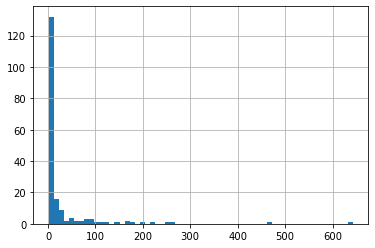

In [151]:
line_count = pd.DataFrame(mcu.groupby(["movie","character"]).line.nunique())
line_count.reset_index(inplace=True)
line_count = line_count.pivot(index="character", columns="movie", values="line")
line_count.fillna(0, inplace=True)
line_count["total"] = line_count.sum(axis=1)
line_count = line_count.astype("int64")
line_count.sort_values(by="total", ascending=False)

line_count['total'].hist(bins=60)
pd.DataFrame(line_count['total']).describe(percentiles = DESCRIBE_PERCENTILES)

### Words Per Line Distribution <a name="words-per-line-distributions"></a>

This cell explores the distribution of the number of words per line of dialogue.

,words
count,5044.000000
mean,10.236915
std,10.598077
min,1.000000
25%,4.000000
50%,7.000000
75%,13.000000
90%,22.000000
95%,29.000000
99%,50.000000


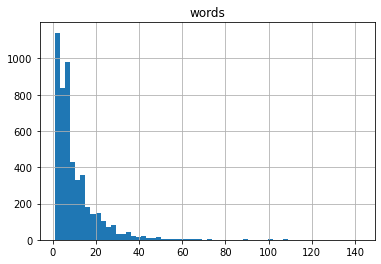

In [152]:
mcu.hist(column="words", bins=60)
pd.DataFrame(mcu["words"]).describe(percentiles = DESCRIBE_PERCENTILES)

## Dataset  Preprocessing <a name="preprocessing"></a>

Based on the analysis above,  it is observed that median number of lines a character will speak is 4.  In other words, most characters don't have enough examples to train a classifier on.  So, to solve this problem, the dataset is limited to characters who speak more than 150 lines.  The cells below do this restriction, show which characters will be predicted, and create the dataset `X` and `y`.

In [153]:
min_line_count = 150

is_main_character = mcu["character"].value_counts() > min_line_count
is_main_character = is_main_character.rename("is main character", axis=0)

main_character_rows = is_main_character[mcu["character"]]
main_character_rows = main_character_rows.reset_index(drop=True)

mcu_partial = mcu[main_character_rows]

pd.DataFrame(is_main_character)[is_main_character]

,is main character
TONY STARK,True
THOR,True
STEVE ROGERS,True
BRUCE BANNER,True
PETER QUILL,True
ROCKET,True
NATASHA,True
PEPPER POTTS,True
LOKI,True


In [154]:
y = mcu_partial["character"].to_numpy().astype(str)
X = mcu_partial["line"].to_numpy().astype(str)

X, y = shuffle(X, y, random_state=RANDOM_SEED)

X[0:10], y[0:10]

(array(['Got it.', 'And terrifying.', 'What’s the delta rate?',
        'This is beyond you, metal man. Loki will face Asgardian justice. ',
        'He was kidding.', 'Was he married?',
        'Is this about the Avengers?  Which I know nothing about.',
        'Oh, sure, okayyyy, Quill.', 'Can I ask a few back?',
        'Stark, are you seeing this? '], dtype='<U606'),
 array(['BRUCE BANNER', 'PEPPER POTTS', 'TONY STARK', 'THOR', 'NATASHA',
        'STEVE ROGERS', 'PEPPER POTTS', 'ROCKET', 'TONY STARK',
        'STEVE ROGERS'], dtype='<U12'))

## Models <a name="models"></a>

In [177]:
cross_validator = StratifiedKFold(n_splits=5, random_state=RANDOM_SEED, shuffle=True)
score_method = "balanced_accuracy"

In [178]:
count_vectorizer = CountVectorizer()
stem_count_vectorizer = StemCountVectorizer()

tfidf_transformer = TfidfTransformer()

nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=RANDOM_SEED)
svm_classifier = SVC()

In [179]:
count_params = {'vect__binary': [True, False],
               'vect__stop_words': [None, 'english', stopwords.words('english')],
              'vect__ngram_range': [(1,1), (1,2), (1,3)]}

tfidf_params = {'tfidf__norm': ['l1', 'l2'],
              'tfidf__use_idf': [True, False]}

nb_params = {'clf__alpha': [1, 1e-1, 1e-2, 1e-3],
             'clf__fit_prior': [True, False]}

rf_params = {'clf__criterion': ["gini", "entropy"],
             'clf__max_depth': [None, 7, 8, 9, 10 ,11 ,12],
             'clf__max_features': [None, "sqrt", "log2"],
             'clf__class_weight': [None, 'balanced']}

svm_params = {'clf__C': [1e-2, 1e-1, 0, 1, 10, 100],
              'clf__kernel': ['linear', 'poly', 'rbf'],
              'clf__degree': [2,3,4,5,6],
              'clf__gamma': ['scale', 'auto'],
              'clf__class_weight': [None, 'balanced']}

### Model 1 (Naive Bayes, no TFIDF, no stemming) <a name="model1"></a>

In [8]:
pipe1 = Pipeline([('vect', count_vectorizer), 
                  ('clf', nb_classifier)])

parameters1 = {**count_params, **nb_params}

grid1 = GridSearchCV(pipe1, parameters1, cv=cross_validator, scoring=score_method, n_jobs=-1, verbose=3)

grid1.fit(X,y)

grid1.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   11.7s finished


{'clf__alpha': 0.1,
 'clf__fit_prior': False,
 'vect__binary': True,
 'vect__ngram_range': (1, 3),
 'vect__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',
 

In [180]:
model1 = Pipeline([('vect', CountVectorizer(binary=True, ngram_range = (1,3), stop_words = stopwords.words('english'))),
                  ('clf', MultinomialNB(alpha=0.1, fit_prior=False))])

### Model 2 (Naive Bayes, TFIDF, no stemming) <a name="model2"></a>

In [10]:
pipe2 = Pipeline([('vect', count_vectorizer),
                  ('tfidf', tfidf_transformer),
                  ('clf', nb_classifier)])

parameters2 = {**count_params, **tfidf_params, **nb_params}

grid2 = GridSearchCV(pipe2, parameters2, cv=cross_validator, scoring=score_method, n_jobs=-1, verbose=3)

grid2.fit(X,y)

grid2.best_params_

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 2232 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:   42.1s finished


{'clf__alpha': 0.1,
 'clf__fit_prior': False,
 'tfidf__norm': 'l2',
 'tfidf__use_idf': True,
 'vect__binary': False,
 'vect__ngram_range': (1, 2),
 'vect__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during'

In [181]:
model2 = Pipeline([('vect', CountVectorizer(binary=False, ngram_range=(1,2), stop_words=stopwords.words('english'))),
                  ('tfidf', TfidfTransformer(norm='l2', use_idf=True)),
                  ('clf', MultinomialNB(alpha=0.1, fit_prior=False))])

### Model 3 (Naive Bayes, no TFIDF,  stemming) <a name="model3"></a>

In [11]:
pipe3 = Pipeline([('vect', stem_count_vectorizer),
                  ('clf', nb_classifier)])

parameters3 = {**count_params, **nb_params}

grid3 = GridSearchCV(pipe3, parameters3, cv=cross_validator, scoring=score_method, n_jobs=-1, verbose=3)

grid3.fit(X,y)

grid3.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 24.0min finished


{'clf__alpha': 0.1,
 'clf__fit_prior': False,
 'vect__binary': False,
 'vect__ngram_range': (1, 1),
 'vect__stop_words': None}

In [182]:
model3 = Pipeline([('vect', StemCountVectorizer(binary=False, ngram_range = (1,1), stop_words = None)),
                  ('clf', MultinomialNB(alpha=0.1, fit_prior=False))])

### Model 4 (Naive Bayes, TFIDF, stemming) <a name="model4"></a>

In [12]:
pipe4 = Pipeline([('vect', stem_count_vectorizer),
                  ('tfidf', tfidf_transformer),
                  ('clf', nb_classifier)])

parameters4 = {**count_params, **tfidf_params, **nb_params}

grid4 = GridSearchCV(pipe4, parameters4, cv=cross_validator, scoring=score_method, n_jobs=-1, verbose=3)

grid4.fit(X,y)

grid4.best_params_

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed: 50.9min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed: 67.0min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 85.2min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 95.7min finished


{'clf__alpha': 0.01,
 'clf__fit_prior': False,
 'tfidf__norm': 'l2',
 'tfidf__use_idf': True,
 'vect__binary': False,
 'vect__ngram_range': (1, 2),
 'vect__stop_words': None}

In [183]:
model4 = Pipeline([('vect', StemCountVectorizer(binary=False, ngram_range=(1,2), stop_words=None)),
                  ('tfidf', TfidfTransformer(norm='l2', use_idf=True)),
                  ('clf', MultinomialNB(alpha=0.01, fit_prior=False))])

### Model 5 (Random Forest, no TFIDF, no stemming) <a name="model5"></a>

In [20]:
pipe5 = Pipeline([('vect', count_vectorizer), 
                  ('clf', rf_classifier)])

parameters5 = {**count_params, **rf_params}

grid5 = GridSearchCV(pipe5, parameters5, cv=cross_validator, scoring=score_method, n_jobs=-1, verbose=3)

grid5.fit(X,y)

grid5.best_params_

Fitting 5 folds for each of 1512 candidates, totalling 7560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed: 51.1min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

{'clf__class_weight': 'balanced',
 'clf__criterion': 'gini',
 'clf__max_depth': None,
 'clf__max_features': 'sqrt',
 'vect__binary': False,
 'vect__ngram_range': (1, 2),
 'vect__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',


In [184]:
model5 = Pipeline([('vect', CountVectorizer(binary=False, ngram_range = (1,2), stop_words = stopwords.words('english'))),
                  ('clf', RandomForestClassifier(class_weight='balanced', criterion="gini", max_depth=None, max_features="sqrt",
                                                 n_jobs=-1, random_state=RANDOM_SEED))])

### Model 6 (Random Forest, TFIDF, no stemming) <a name="model6"></a>

In [13]:
pipe6 = Pipeline([('vect', count_vectorizer),
                  ('tfidf', tfidf_transformer),
                  ('clf', rf_classifier)])

parameters6 = {**count_params, **tfidf_params, **rf_params}

grid6 = GridSearchCV(pipe6, parameters6, cv=cross_validator, scoring=score_method, n_jobs=-1, verbose=3)

grid6.fit(X,y)

grid6.best_params_

Fitting 5 folds for each of 6048 candidates, totalling 30240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

{'clf__class_weight': 'balanced',
 'clf__criterion': 'gini',
 'clf__max_depth': None,
 'clf__max_features': 'log2',
 'tfidf__norm': 'l2',
 'tfidf__use_idf': True,
 'vect__binary': True,
 'vect__ngram_range': (1, 1),
 'vect__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
 

In [185]:
model6 = Pipeline([('vect', CountVectorizer(binary=True, ngram_range=(1,1), stop_words=stopwords.words('english'))),
                  ('tfidf', TfidfTransformer(norm='l2', use_idf=True)),
                  ('clf', RandomForestClassifier(class_weight='balanced', criterion="gini", max_depth=None, max_features="log2",
                                                 n_jobs=-1, random_state=RANDOM_SEED))])

### Model 7 (Random Forest, no TFIDF,  stemming) <a name="model7"></a>

In [22]:
pipe7 = Pipeline([('vect', stem_count_vectorizer),
                  ('clf', rf_classifier)])

parameters7 = {**count_params, **rf_params}

grid7 = GridSearchCV(pipe7, parameters7, cv=cross_validator, scoring=score_method, n_jobs=-1, verbose=3)

grid7.fit(X,y)

grid7.best_params_

Fitting 5 folds for each of 1512 candidates, totalling 7560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 47.3min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed: 62.1min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed: 85.3min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 105.5min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 127.2min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed: 155.7min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed: 183.8min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed: 211.4min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed: 250.6min
[Parallel(n_jobs=-1)]: Done 7176 tasks  

{'clf__class_weight': 'balanced',
 'clf__criterion': 'gini',
 'clf__max_depth': 12,
 'clf__max_features': 'log2',
 'vect__binary': True,
 'vect__ngram_range': (1, 1),
 'vect__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  '

In [186]:
model7 = Pipeline([('vect', StemCountVectorizer(binary=True, ngram_range = (1,1), stop_words = stopwords.words('english'))),
                  ('clf', RandomForestClassifier(class_weight='balanced', criterion="gini", max_depth=12, max_features="log2",
                                                 n_jobs=-1, random_state=RANDOM_SEED))])

### Model 8 (Random Forest, TFIDF, stemming) <a name="model8"></a>

**Reminder:** Model 8 was not trained using a GridSearch because the estimated training time was too large (19 hours).  Instead, the parameters were taken from model 6 (which is the same architecture minus stemming) and apply stemming.  

In [187]:
model8 = Pipeline([('vect', StemCountVectorizer(binary=True, ngram_range=(1,1), stop_words=stopwords.words('english'))),
                  ('tfidf', TfidfTransformer(norm='l2', use_idf=True)),
                  ('clf', RandomForestClassifier(class_weight='balanced', criterion="gini", max_depth=None, max_features="log2",
                                                 n_jobs=-1, random_state=RANDOM_SEED))])

### Model 9 (SVM, no TFIDF, no stemming) <a name="model9"></a>

In [8]:
pipe9 = Pipeline([('vect', count_vectorizer), 
                  ('clf', svm_classifier)])

parameters9 = {**count_params, **svm_params}

grid9 = GridSearchCV(pipe9, parameters9, cv=cross_validator, scoring=score_method, n_jobs=-1, verbose=3)

grid9.fit(X,y)

grid9.best_params_

Fitting 5 folds for each of 6480 candidates, totalling 32400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

{'clf__C': 0.1,
 'clf__class_weight': 'balanced',
 'clf__degree': 2,
 'clf__gamma': 'scale',
 'clf__kernel': 'linear',
 'vect__binary': True,
 'vect__ngram_range': (1, 1),
 'vect__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into'

In [188]:
model9 = Pipeline([('vect', CountVectorizer(binary=True, ngram_range = (1,1), stop_words = stopwords.words('english'))),
                  ('clf', SVC(C=0.1, class_weight='balanced', degree=2, gamma="scale", kernel='linear'))])

### Model 10 (SVM, TFIDF, no stemming) <a name="model10"></a>

In [9]:
pipe10 = Pipeline([('vect', count_vectorizer),
                  ('tfidf', tfidf_transformer),
                  ('clf', svm_classifier)])

parameters10 = {**count_params, **tfidf_params, **svm_params}

grid10 = GridSearchCV(pipe10, parameters10, cv=cross_validator, scoring=score_method, n_jobs=-1, verbose=3)

grid10.fit(X,y)

grid10.best_params_

Fitting 5 folds for each of 25920 candidates, totalling 129600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

{'clf__C': 100,
 'clf__class_weight': None,
 'clf__degree': 2,
 'clf__gamma': 'scale',
 'clf__kernel': 'linear',
 'tfidf__norm': 'l1',
 'tfidf__use_idf': True,
 'vect__binary': True,
 'vect__ngram_range': (1, 2),
 'vect__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'a

In [189]:
model10 = Pipeline([('vect', CountVectorizer(binary=True, ngram_range = (1,2), stop_words = stopwords.words('english'))),
                    ('tfidf', TfidfTransformer(norm='l1', use_idf=True)),
                  ('clf', SVC(C=100, class_weight=None, degree=2, gamma="scale", kernel='linear'))])

### Model 11 (SVM, no TFIDF,  stemming) <a name="model11"></a>

In [23]:
pipe11 = Pipeline([('vect', stem_count_vectorizer),
                  ('clf', svm_classifier)])

parameters11 = {**count_params, **svm_params}

grid11 = GridSearchCV(pipe11, parameters11, cv=cross_validator, scoring=score_method, n_jobs=-1, verbose=3)

grid11.fit(X,y)

grid11.best_params_

Fitting 5 folds for each of 6480 candidates, totalling 32400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed: 52.9min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed: 69.3min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 88.4min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 109.0min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed: 131.8min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed: 157.0min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed: 184.3min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed: 214.8min
[Parallel(n_jobs=-1)]: Done 7176 tasks   

{'clf__C': 0.1,
 'clf__class_weight': 'balanced',
 'clf__degree': 2,
 'clf__gamma': 'scale',
 'clf__kernel': 'linear',
 'vect__binary': True,
 'vect__ngram_range': (1, 1),
 'vect__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into'

In [190]:
model11 = Pipeline([('vect', StemCountVectorizer(binary=True, ngram_range = (1,1), stop_words = stopwords.words('english'))),
                    ('clf', SVC(C=0.1, class_weight='balanced', degree=2, gamma="scale", kernel='linear'))])

### Model 12 (SVM, TFIDF, stemming) <a name="model12"></a>

**Reminder:** Model 12 was not trained using a GridSearch because the estimated training time was too large (90 hours).  Instead, the parameters were taken from model 10 (which is the same architecture minus stemming) and apply stemming.  

In [191]:
model12 = Pipeline([('vect', StemCountVectorizer(binary=True, ngram_range = (1,2), stop_words = stopwords.words('english'))),
                    ('tfidf', TfidfTransformer(norm='l1', use_idf=True)),
                  ('clf', SVC(C=100, class_weight=None, degree=2, gamma="scale", kernel='linear'))])

# Results <a name="results"></a>

## Cross Validation Scores (Balanced Accuracy) <a name="cvscores"></a>

To compare the models generated, the cell below performs cross validation using all of the data and reports the balanced accuracy of each model.  Balanced accuracy was used because the number of examples in each class is unequal.  

The use of all of the data to estimate the balanced accuracies of the models poses a problem.  Because the hyperparameters were tunned using `GridSearchCV` on all of the data, the models are being evaluated on the same data that was used to construct them.  This could inflate their balanced accuracies higher than what might be observed on new, unseen data.  One solution to this problem, nested cross validation, was tried, but not used in the final models because it would be too computationally expensive to compute.  

In [192]:
models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11, model12]

cv_score_table = pd.DataFrame()

for i in range(0,len(models)):
    results = cross_val_score(models[i], X, y, cv=cross_validator, scoring=score_method, n_jobs=-1)
    cv_score_table.insert(i, "model " + str(i+1), results, True)

cv_score_table.index.name = "fold"
cv_score_table.loc["mean"] = cv_score_table.mean()
cv_score_table.loc["std"] = cv_score_table.std()
cv_score_table.loc["max"] = cv_score_table.max()

cv_score_table

,model 1,model 2,model 3,model 4,model 5,model 6,model 7,model 8,model 9,model 10,model 11,model 12
fold,,,,,,,,,,,,
0,0.246431,0.262304,0.279967,0.298393,0.252171,0.241791,0.250181,0.247971,0.228689,0.263049,0.238601,0.248601
1,0.237293,0.240437,0.267587,0.256184,0.259556,0.228762,0.266336,0.247240,0.224073,0.238305,0.217469,0.242112
2,0.262779,0.263440,0.260520,0.251073,0.250973,0.243186,0.212957,0.247465,0.239520,0.239635,0.241729,0.264450
3,0.290719,0.281750,0.290900,0.273962,0.214795,0.243444,0.251129,0.242757,0.261810,0.240827,0.259531,0.260938
4,0.270262,0.297584,0.234098,0.277709,0.230772,0.268181,0.225633,0.237491,0.218439,0.294691,0.228449,0.272966
mean,0.261497,0.269103,0.266614,0.271464,0.241653,0.245073,0.241247,0.244585,0.234506,0.255301,0.237156,0.257814
std,0.018683,0.019345,0.019306,0.016850,0.016479,0.012783,0.019241,0.004012,0.015306,0.021704,0.014050,0.011089
max,0.290719,0.297584,0.290900,0.298393,0.259556,0.268181,0.266336,0.247971,0.261810,0.294691,0.259531,0.272966


## Best Model <a name="best-model"></a>

Based on the mean balanced accuracy from the table above, model 4 performs the best.  As a reminder, model 4 is a Naive Bayes Classifier that uses TF / IDF transformation and stemming.

| Balanced Accuracy | Model 4  |
| ----------------- | -------- |
| mean              | 0.271464 |
| max               | 0.298393 |

## Baseline Comparisons <a name="baselines"></a>

In order to further understand the performance of model 4, let's compare it to some baseline models.

### Majority Classifier <a name="majority-classifier"></a>

In [166]:
from sklearn.base import BaseEstimator

class MajorityClassifier(BaseEstimator):
    def __init__(self):
        self.majority_label = None
        
    def fit(self,X,y):
        unique_elements, counts_elements = np.unique(y, return_counts=True)
        self.majority_label = unique_elements[np.argmax(counts_elements)]
        
    def predict(self,X):
        return np.array([self.majority_label] * X.shape[0])

### Random Classifier <a name="random-classifier"></a>

In [167]:
from numpy.random import default_rng

class RandomClassifier(BaseEstimator):
    def __init__(self):
        self.possible_labels = None
        self.rng = default_rng(RANDOM_SEED)
        
    def fit(self,X,y):
        self.possible_labels = np.unique(y)
        
    def predict(self,X):
        return self.rng.choice(self.possible_labels, X.shape[0], replace=True)

### Comparison with Model 4 <a name="comparison-model-4"></a>

In [168]:
models = [RandomClassifier(), MajorityClassifier(), model4]

cv_score_table = pd.DataFrame()
column_names = ["random", "majority", "model 4"]

for i in range(0,len(models)):
    results = cross_val_score(models[i], X, y, cv=cross_validator, scoring=score_method, n_jobs=-1)
    cv_score_table.insert(i, column_names[i], results, True)

cv_score_table.index.name = "fold"
cv_score_table.loc["mean"] = cv_score_table.mean()
cv_score_table.loc["std"] = cv_score_table.std()
cv_score_table.loc["max"] = cv_score_table.max()

cv_score_table

,random,majority,model 4
fold,,,
0,0.110231,1.111111e-01,0.298393
1,0.105197,1.111111e-01,0.256184
2,0.122066,1.111111e-01,0.251073
3,0.136021,1.111111e-01,0.273962
4,0.112153,1.111111e-01,0.277709
mean,0.117133,1.111111e-01,0.271464
std,0.010918,1.387779e-17,0.016850
max,0.136021,1.111111e-01,0.298393


It can be seen above that model 4 out performes both a random classifier and a majority classifier with over double the balanced accuracy.  This means that even though performance is poor, model 4 is correclty using Naive Bayes to classify some examples.

## Confusion Matrix <a name="confusion-matrix"></a>

Below is a confusion matrix generated by training the best model, model 4 on a subset of the data.  This yields a more accurate balanced accuracy than reported above because the model here is being tested using data it was not trained with.  

balanced_accuracy: 0.2945764345872786


,plot legend,# of examples
0,TONY STARK,645
1,THOR,479
2,STEVE ROGERS,260
3,BRUCE BANNER,258
4,PETER QUILL,228
5,ROCKET,198
6,NATASHA,179
7,PEPPER POTTS,172
8,LOKI,164


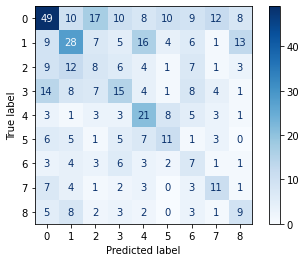

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
model4.fit(X_train,y_train)
yhat = model4.predict(X_test)

print("balanced_accuracy:", metrics.balanced_accuracy_score(y_test, yhat))

main_characters = pd.DataFrame(is_main_character)[is_main_character].index.values

metrics.plot_confusion_matrix(model4, X_test, y_test, labels = main_characters, display_labels = np.arange(9),
                             values_format = 'd', cmap=plt.cm.Blues)

line_counts = pd.DataFrame(mcu_partial["character"].value_counts())["character"]
table = pd.DataFrame({"plot legend": main_characters, "# of examples": line_counts})
table.reset_index(drop=True, inplace=True)

table

Printed above, it can be shown that a random split of the data can yield a balanced accuracy similar to the one reported by cross validation.

In the matrix above, the diagonal elements (elements for which model 4 correctly predicts the character) are darker than those surrounding them.  This indicates that the model is correctly classifying some examples.  It can also be seen that there is a general gradient from light to dark closer to the upper left corner.  This is most likely because the characters indexed in that corner have more training examples than the others.  The total number of examples in the dataset for each character can be seen in the legend table.

This gradient suggests that there may be a bias in the model towards classes with more training examples.  The plot below explores this question with learning curves.

## Learning Curves <a name="learning-curves"></a>

In [55]:
def plot_learning_curve(estimator, title, X, y, axes=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")

    return plot

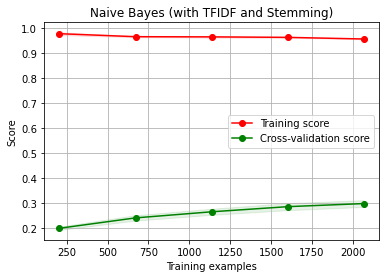

In [56]:
from sklearn.model_selection import learning_curve

title = "Naive Bayes (with TFIDF and Stemming)"

plot_learning_curve(model4, title, X, y, cv=cross_validator)

It can be seen above that there is a great difference in balanced accuracy between the training and cross-validation (testing) sets.  Not only is this observed, but it can also be observed that as the number of training examples increases, the cross-validation scores are slowly increasing.  This suggests that in relationship to the number of training examples, the scores have not yet converged, and that **more data would most likely increase the accuracy of model 4.**

It is hypothesized that all the models perform between 20-30% because they do not have enough data to understand the complexity of the problem

# Conclusions  <a name="conclusions"></a>

## Project Improvements <a name="project-improvements"></a>

Given more time on the project, one thing I would like to explore is the performance of these 12 models given more data to train with.  The dataset, after limiting to characters with more than 150 lines, is only comprised of 2583 examples, which average about 10 words each.  The character with the most examples, Tony Stark, only has 645 lines.  By including the rest of the scripts released on Script Slug, and possibly transcripts of all 21 MCU movies, model performance could be greatly increased.

Another aspect of the project that could be improved is the training time of the models.  The GridSearches peformed could be limited with a better understanding of each parameter, and could thus allow for quicker training times and maybe even nested cross validation.

Finally, the project could benefit from the exploration of Word2Vec or neural networks.  These techniques have shown to be effective on very complex problems.

## Takeaways <a name="takeaways"></a>

In this project I learned a lot about NLP techniques, as well as learned about models I hadn't been exposed to before. New to me were the concepts of turning a document into a word count vector, stemming, TF / IDF transformations, and stop words.  As far as models go, this was also the first time that I got to create a Naive Bayes, SVM, and Random Forest model.  I feel like I know a lot more about ML now than when I started this project!  Using Scikit-learn in this context also helped establish a set of skills which I can apply to other projects. 

## Moving Forward <a name="moving-forward"></a>

Moving forward, I would like to continue to explore the models and techniques used in this project.  I believe that what hindered my progress through this project was a lack of knowledge about which parameters are most significant to a model's success.  Although I read and learned about what each parameter does, I was unsure about which would have the biggest change on a model.  This is why I performed such vast grid searches.  I almost wonder if my time would have been better exploring more models and processing techniques, such as Word2Vec or neural networks, than waiting for these models to train.  

I would also like to be more scientific and organized when I start my next project.  In this project, I began by just trying different things, whereas I would have liked to started with more of a plan.  I also would like to think about how and on what machine I train, so I can not waste time.  In future projects, I think having the experience I gained here will be a big help when constructing a more robust methodology.

# Sources <a name="sources"></a>

Ben-Hur, Asa. “CS345: Machine Learning Foundations and Practice.” GitHub, Colorado State University, 7 Dec. 2020, www.github.com/asabenhur/CS345. 

Charles R. Harris, et al. "Array programming with NumPy". Nature 585. 7825(2020): 357–362.

Reback, J. et al. pandas-dev/pandas: Pandas 1.0.3. v1.0.3, Zenodo, 18 Mar. 2020.

Lathrom, Matt. “Marvel Scripts.” Script Slug, www.scriptslug.com/scripts/category/marvel. 

Pedregosa, F. et al. "Scikit-learn: Machine Learning in Python". Journal of Machine Learning Research 12. (2011): 2825–2830.

Shaikh, Javed. “Machine Learning, NLP: Text Classification Using Scikit-Learn, Python and NLTK.” Medium, Towards Data Science, 30 Oct. 2017, www.towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a. 

Starmer, Josh. “Naive Bayes, Clearly Explained!!!” YouTube, StatQuest with Josh Starmer, 3 June 2020, www.youtube.com/watch?v=O2L2Uv9pdDA. 

Starmer, Josh. “Support Vector Machines, Clearly Explained!!!” YouTube, StatQuest with Josh Starmer, 30 September 2019, https://www.youtube.com/watch?v=efR1C6CvhmE&list=RDCMUCtYLUTtgS3k1Fg4y5tAhLbw&start_radio=1&rv=efR1C6CvhmE&t=1. 

